In [1]:
import umap
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [25]:
def make_single_cells(cells, lambdas):
    return np.random.poisson(lambdas, (cells, len(lambdas)))

In [122]:
n_genes = 1000
quarter = int(np.floor(n_genes / 4))

min_exp = 0
max_exp = 0.1

pop1 = np.random.uniform(min_exp, max_exp, n_genes)
pop2 = np.hstack([pop1[:3 * quarter], pop1[3 * quarter:] * 3])
pop3 = np.hstack([np.random.uniform(min_exp, max_exp, quarter), pop1[quarter:]])
pop4 = np.hstack([pop1[:quarter], pop1[quarter:quarter * 2] * .1, pop1[2 * quarter:]])

In [123]:
pop_sizes = 500
cells = np.zeros((pop_sizes * 4, len(pop1)))
for i, p in enumerate([pop1, pop2, pop3, pop4]):
    print(i, len(p))
    cells[i * pop_sizes: (i + 1) * pop_sizes] = make_single_cells(pop_sizes, p)
    
    
df = pd.DataFrame(cells, columns=['Gene' + str(i) for i in range(len(pop1))])
df = np.log1p(df / df.sum(axis=0))

df['Group'] = [int(np.floor(i / pop_sizes)) for i in range(len(cells))]
df.Group = df.Group.astype('category')

0 1000
1 1000
2 1000
3 1000


In [182]:
pca = PCA(50)
coords = pca.fit_transform(StandardScaler().fit_transform(cells))
pc = pd.DataFrame(coords, columns=['PC' + str(i + 1) for i in range(len(coords.T))])
pc['Group'] = df.Group

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

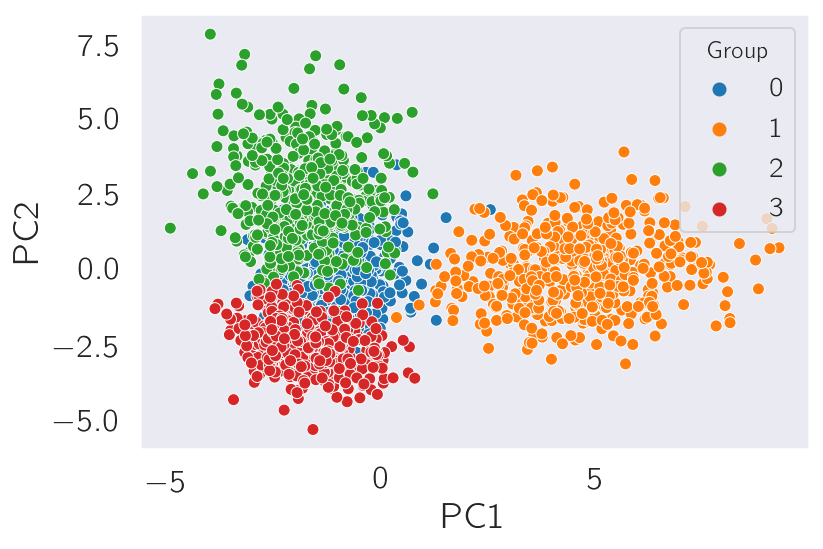

In [183]:
sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pc)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

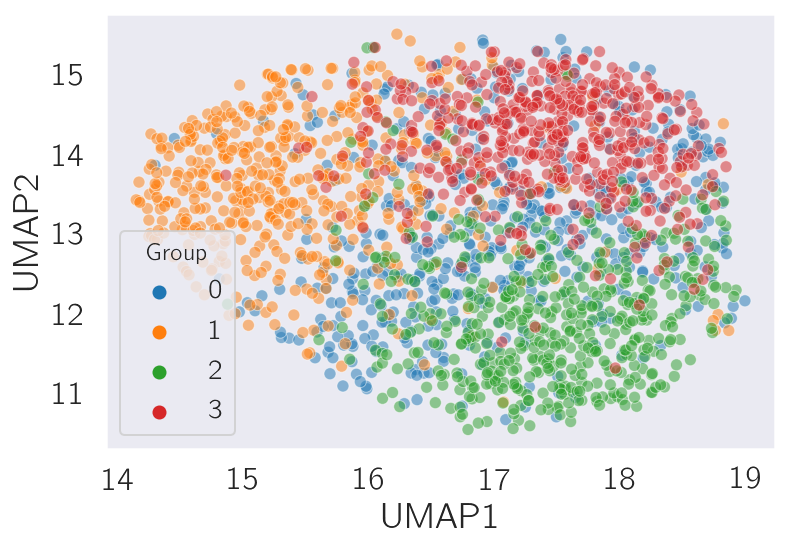

In [193]:
fit = umap.UMAP(n_neighbors=30).fit_transform(coords)
fit = pd.DataFrame(fit, columns=['UMAP' + str(i + 1) for i in range(len(fit.T))])
fit['Group'] = df.Group
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=fit, alpha=0.5)

In [188]:
k = 3
km = KMeans(k)
km.fit_transform(coords)
pc['Labels'] = km.labels_

fixed = pc[[c for c in pc.columns if 'PC' in c]] - km.cluster_centers_[km.labels_]

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

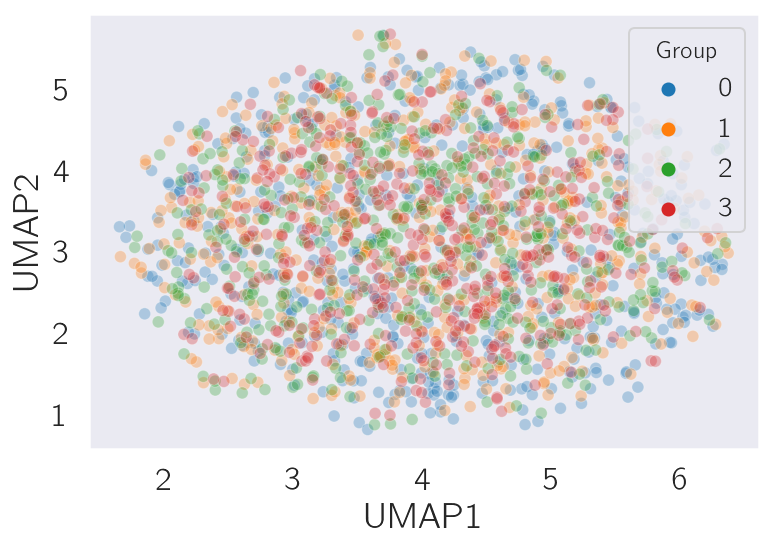

In [192]:
fit = umap.UMAP(n_neighbors=30).fit_transform(fixed)
fit = pd.DataFrame(fit, columns=['UMAP' + str(i + 1) for i in range(len(fit.T))])
fit['Group'] = df.Group
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Group', data=fit, alpha=0.3)